In [2]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

# Load the .txt file
# Construct the file path
file_path = os.path.join(rpath, 'data', 'MachineLearningRating_v3.txt')

# Skip lines with too many fields
# Try with different delimiters
data = pd.read_csv(file_path, delimiter='|')  # Tab-delimited
data.head()

C:\Users\AII\AppData\Local\Temp\ipykernel_8312\151732833.py:16: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')  # Tab-delimited


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


**Data Transforming**

In [3]:
# Convert date columns in to datetime format
data['VehicleIntroDate'] = (pd.to_datetime(data['VehicleIntroDate'])) #.dt.date
data['TransactionMonth'] = (pd.to_datetime(data['TransactionMonth'])) #.dt.date

C:\Users\AII\AppData\Local\Temp\ipykernel_8312\1932814567.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['VehicleIntroDate'] = (pd.to_datetime(data['VehicleIntroDate'])) #.dt.date


**Statistical Analysis**

In [4]:
#Lets Review the dtype of each column to confirm if they are formatted well
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

**Descriptive Statistics**
* To observe the variability of the  data 

In [5]:
# Descriptive statistics for numerical columns
numerical_cols = ['TotalClaims', 'TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm']
data[numerical_cols].describe()

,TotalClaims,TotalPremium,SumInsured,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.486119e+01,6.190550e+01,6.041727e+05,1.178757e+02
std,2.384075e+03,2.302845e+02,1.508332e+06,3.997017e+02
min,-1.200241e+04,-7.825768e+02,1.000000e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+03,3.224800e+00
50%,0.000000e+00,2.178333e+00,7.500000e+03,8.436900e+00
75%,0.000000e+00,2.192982e+01,2.500000e+05,9.000000e+01
max,3.930921e+05,6.528260e+04,1.263620e+07,7.442217e+04


In [7]:
# Summary of categorical variables
categorical_cols = ['Citizenship', 'VehicleType', 'CoverType', 'Gender']
for col in categorical_cols:
    print(f"{col} value counts:\n{data[col].value_counts()}\n")

Citizenship value counts:
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

VehicleType value counts:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64

CoverType value counts:
CoverType
Own Damage                                             104183
Passenger Liability                                    104158
Windscreen                                             103763
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                                      102416
Cleaning and Removal of Accident Debris                102414
Income Protector                                        64813
Basic Excess Waiver                                     57769
Accidental Death        

**Missing and Duplicate Data Handeling**

* Missind Data Handling

In [8]:
#Lets find out the missing values and how much of it
from scripts.data_handling import missing_values_table, handling_missing_data
missing_values_df = missing_values_table(data)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 52 columns.
There are 22 columns that have missing values.
Missing Values in df:
                         Missing Values  % of Total Values           Dtype
NumberOfVehiclesInFleet         1000098              100.0         float64
CrossBorder                      999400               99.9          object
CustomValueEstimate              779642               78.0         float64
WrittenOff                       641901               64.2          object
Converted                        641901               64.2          object
Rebuilt                          641901               64.2          object
NewVehicle                       153295               15.3          object
Bank                             145961               14.6          object
AccountType                       40232                4.0          object
Gender                             9536                1.0          object
MaritalStatus                      8259                0.8        

In [9]:
data_cleaned = handling_missing_data(data)
missing_values_df = missing_values_table(data_cleaned)
print("Missing Values in df:")
print(missing_values_df)

c:\Users\AII\Desktop\Insurance-Data-Analytics\scripts\data_handling.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datacleaned[date_cols] = datacleaned[date_cols].fillna(method='ffill').fillna(method='bfill')


Your selected dataframe has 50 columns.
There are 0 columns that have missing values.
Missing Values in df:
Empty DataFrame
Columns: [Missing Values, % of Total Values, Dtype]
Index: []


* Duplicated data handling

In [15]:
# Count the number of duplicated rows
num_duplicated_rows = data_cleaned.duplicated().sum()

# Display the result
print(f"Number of duplicated rows: {num_duplicated_rows}")


Number of duplicated rows: 0


**Univarite Analysis**

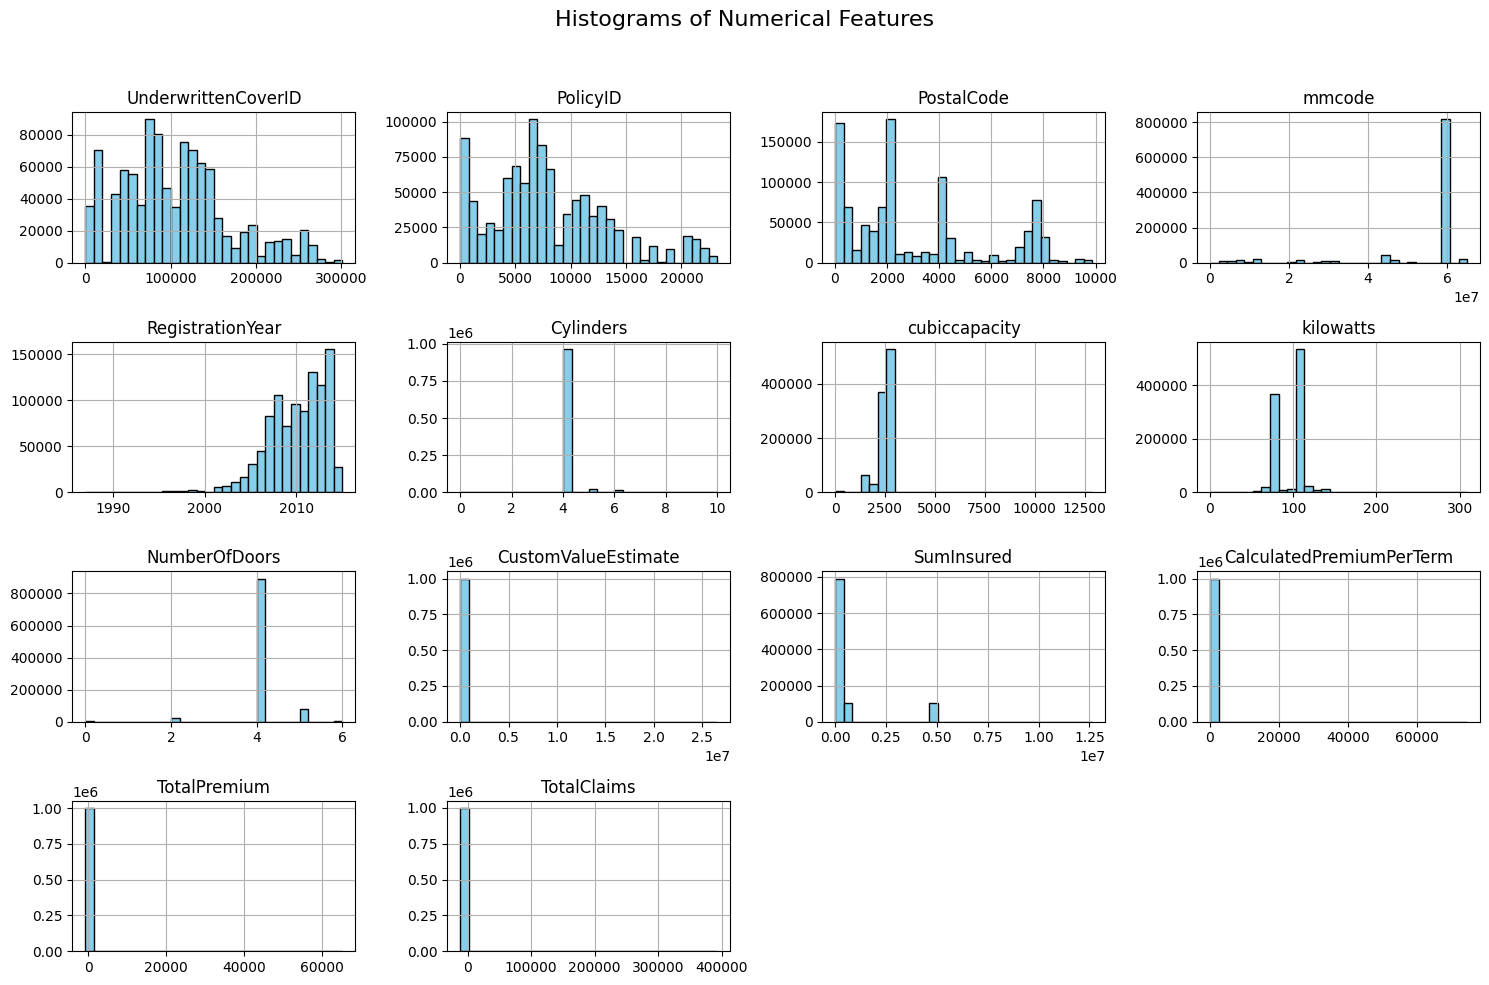

In [12]:
import matplotlib.pyplot as plt
# Identify numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Clean the data: Replace inf and -inf with NaN, then replace NaN with the mean of the column
def clean_data(df, columns):
    df[columns] = df[columns].replace([np.inf, -np.inf], np.nan)  # Replace inf values
    df[columns] = df[columns].fillna(df[columns].mean())  # Fill NaN with column mean
    return df

# Clean the data before plotting
data_cleaned = clean_data(data_cleaned, numerical_columns)

# Plot histograms for numerical columns
def plot_histograms(df, columns):
    df[columns].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
    plt.suptitle('Histograms of Numerical Features', size=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call the function
plot_histograms(data_cleaned, numerical_columns)


**Bivarite and Multivarite Analysis**

In [20]:
data_cleaned['MainCrestaZone'].unique()

array(['Rand East', 'Transvaal (all except Pretoria)', 'Johannesburg',
       'Natal (Durban)', 'Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1',
       'Transvaal (Pretoria)', 'Natal', 'Cape Province (Cape Town)',
       'Langkloof, Coast 2, Coast 1',
       'Cape Province (East and North of Cape Town)', 'Oranje Free State',
       'East London', 'Port Elizabeth', 'Ciskei, Cape Mid 1',
       'Cape Province', 'Karoo 1 (Northeast of Cape Town)'], dtype=object)

C:\Users\AII\AppData\Local\Temp\ipykernel_8312\398581405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette='Set2')
C:\Users\AII\AppData\Local\Temp\ipykernel_8312\398581405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette='Set2')
C:\Users\AII\AppData\Local\Temp\ipykernel_8312\398581405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette='Set2')
C:\Users\AII\AppData\Local\Temp\ipykernel_8312\398581405.py:18: Future

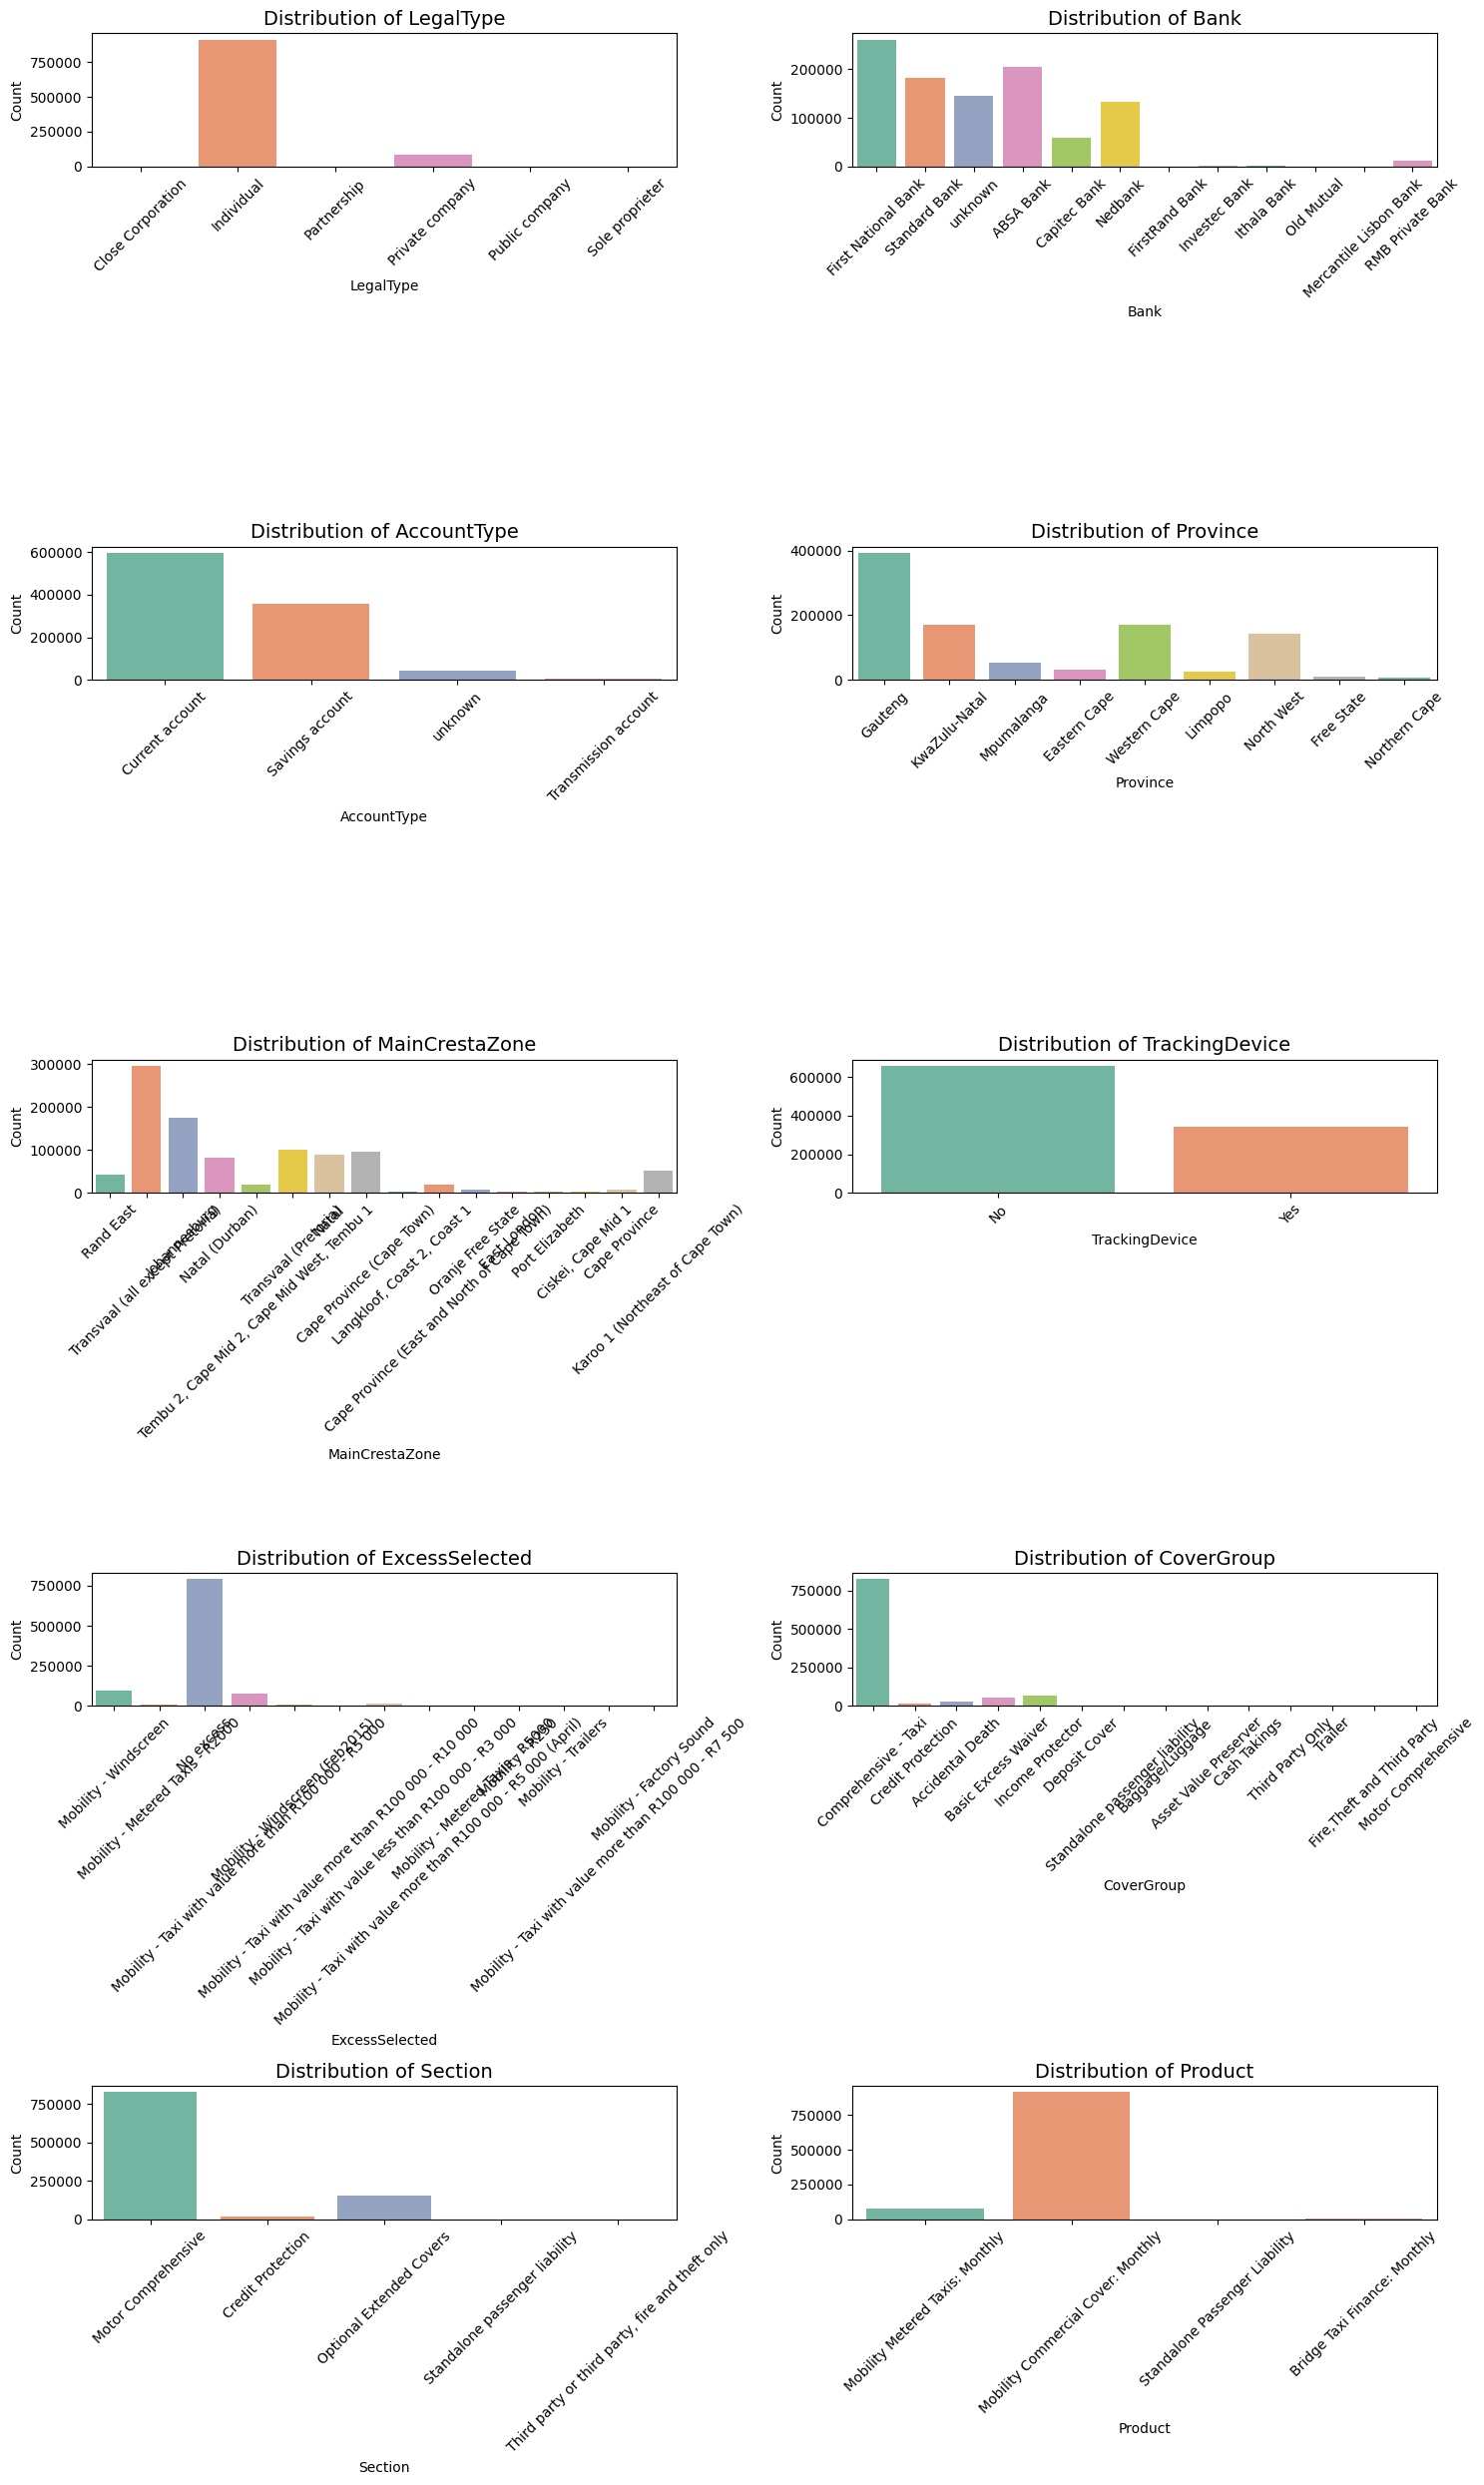

In [18]:
import seaborn as sns
# Correct the way to select columns from the DataFrame
categorical_columns = ['LegalType', 'Bank', 'AccountType', 'Province', 'MainCrestaZone',
                       'TrackingDevice', 'ExcessSelected', 'CoverGroup',
                       'Section', 'Product']

# Plot bar charts for categorical columns in two columns layout
def plot_bar_charts(df, columns):
    # Define number of rows based on how many columns we have
    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols  # Add 1 to ensure rounding up

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Flatten to easily iterate over axes

    for i, column in enumerate(columns):
        if df[column].nunique() < 20:  # Plot bar charts only for columns with fewer than 20 unique values
            sns.countplot(x=column, data=df, ax=axes[i], palette='Set2')
            axes[i].set_title(f'Distribution of {column}', size=14)
            axes[i].set_ylabel('Count')
            axes[i].set_xlabel(column)
            axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots if the number of plots is odd
    if len(columns) % n_cols != 0:
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_bar_charts(data_cleaned, categorical_columns)


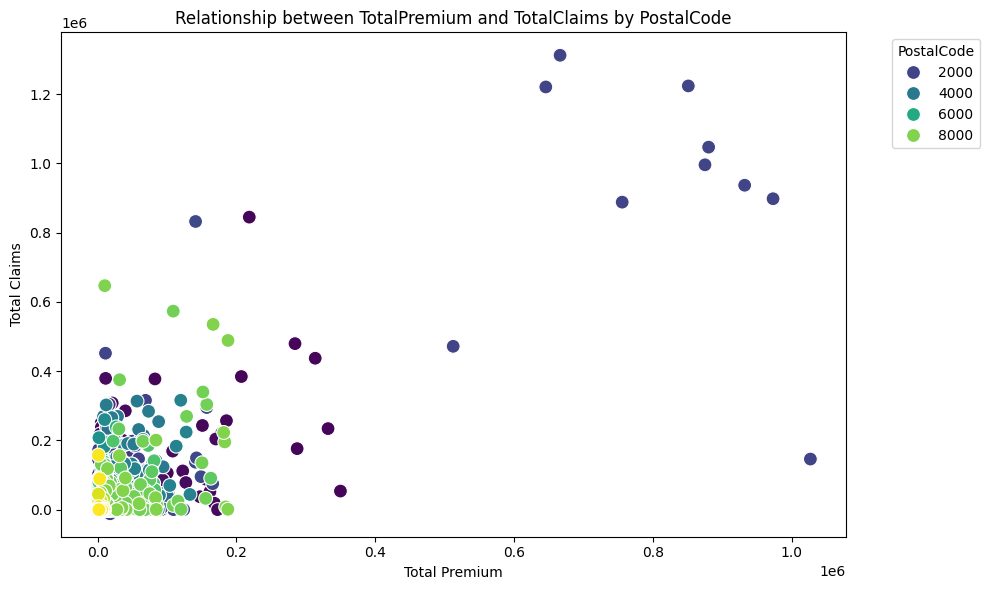

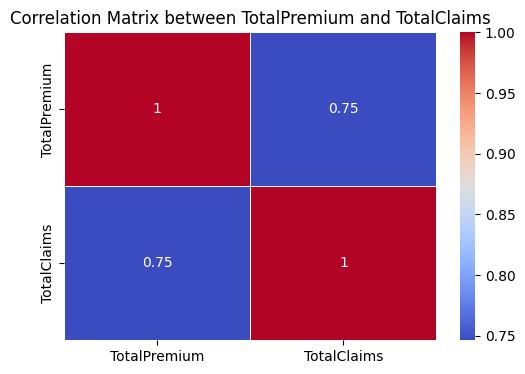

In [ ]:
# Step 1: Aggregate data by 'PostalCode' and 'TransactionMonth'
data_cleaned['TransactionMonth'] = pd.to_datetime(data_cleaned['TransactionMonth'], format='%m').dt.month
monthly_data = data_cleaned.groupby(['PostalCode', 'TransactionMonth']).agg({
    'TotalPremium': 'sum',  # Summing the TotalPremium for each month
    'TotalClaims': 'sum'    # Summing the TotalClaims for each month
}).reset_index()

# Step 2: Plot scatter plot to explore the relationship between TotalPremium and TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=monthly_data, palette='viridis', s=100)
plt.title('Relationship between TotalPremium and TotalClaims by PostalCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 3: Calculate correlation matrix
correlation_matrix = monthly_data[['TotalPremium', 'TotalClaims']].corr()

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between TotalPremium and TotalClaims')
plt.show()


**Data Comparision**

<ipython-input-32-787d6f1bc5e2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalPremium', data=df, ax=axes[0], palette='Blues_d')
<ipython-input-32-787d6f1bc5e2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='CoverType', data=df, ax=axes[1], palette='Greens_d')
<ipython-input-32-787d6f1bc5e2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='make', data=df, ax=axes[2], palette='Reds_d')


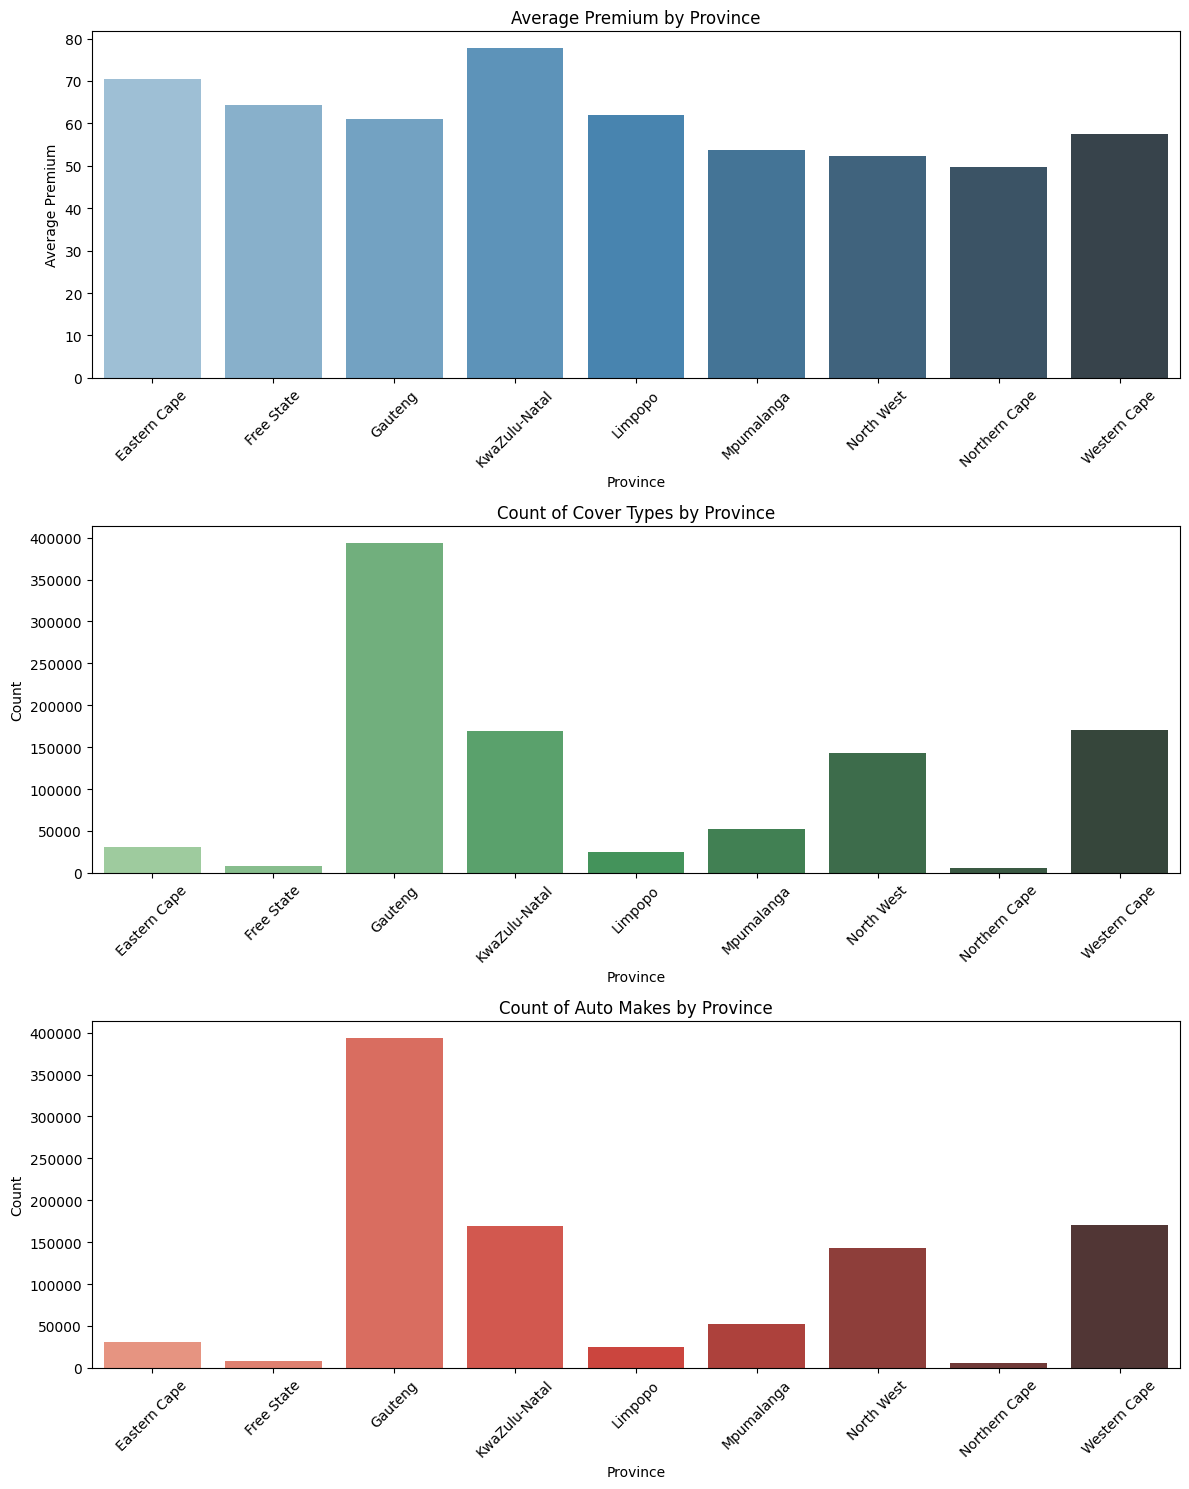

In [ ]:
# Group by geographic regions (e.g., 'Province') and calculate mean premium
grouped_data = data_cleaned.groupby('Province').agg({
    'TotalPremium': 'mean',
    'CoverType': 'count',  # Assuming CoverType is categorical
    'make': 'count'
}).reset_index()

# Plot grouped bar charts for different categories
def plot_trends_over_geography(df):
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    # Plot total premium by province
    sns.barplot(x='Province', y='TotalPremium', data=df, ax=axes[0], palette='Blues_d')
    axes[0].set_title('Average Premium by Province')
    axes[0].set_ylabel('Average Premium')
    axes[0].tick_params(axis='x', rotation=45)

    # Plot cover type count by province
    sns.barplot(x='Province', y='CoverType', data=df, ax=axes[1], palette='Greens_d')
    axes[1].set_title('Count of Cover Types by Province')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    # Plot auto make count by province
    sns.barplot(x='Province', y='make', data=df, ax=axes[2], palette='Reds_d')
    axes[2].set_title('Count of Auto Makes by Province')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function to plot trends
plot_trends_over_geography(grouped_data)


**Box Plot: Outlier Detection**

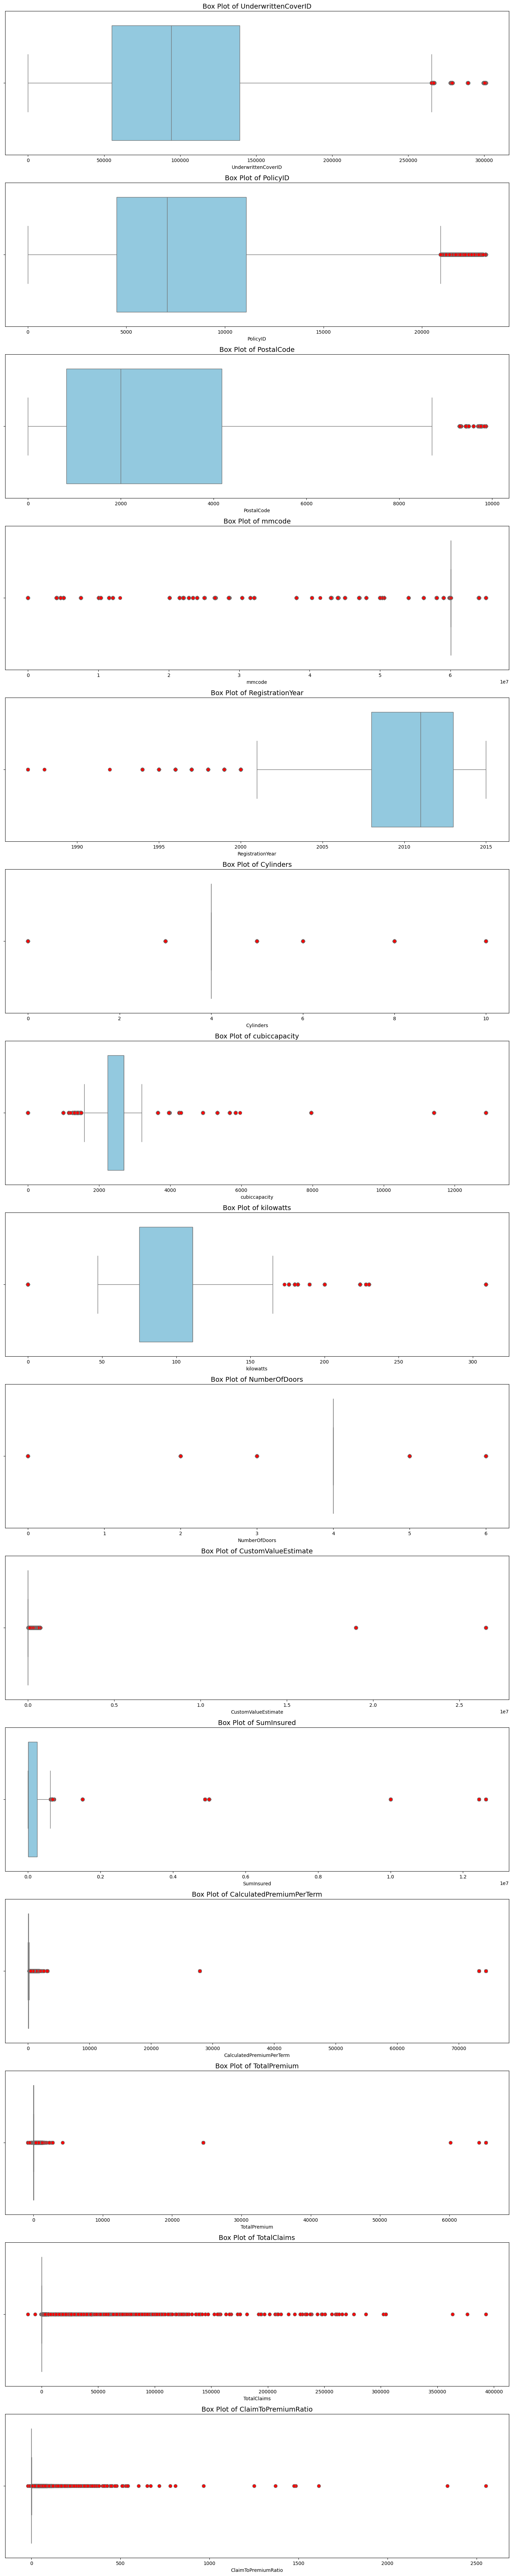

In [ ]:
# Select numerical columns
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for numerical columns
def plot_box_plots(df, columns):
    plt.figure(figsize=(15, len(columns)*5))

    for i, column in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        sns.boxplot(x=df[column], color='skyblue', flierprops={'marker':'o', 'markersize':7, 'markerfacecolor':'red'})
        plt.title(f'Box Plot of {column}', size=14)
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Call the function to plot box plots
plot_box_plots(data_cleaned, numerical_columns)


<ipython-input-40-f05868f6758c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, y='TotalPremium', palette='Set3')


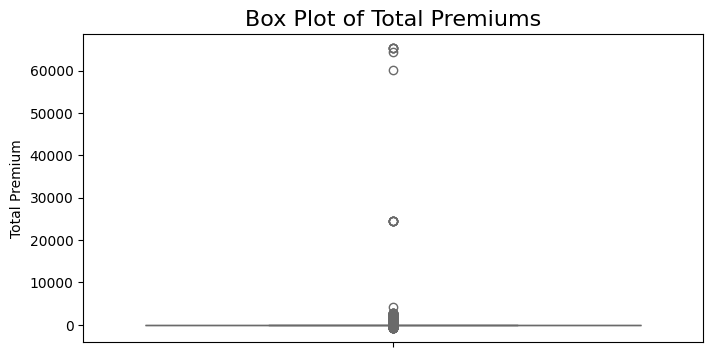

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=data_cleaned, y='TotalPremium', palette='Set3')
plt.title('Box Plot of Total Premiums', fontsize=16)
plt.ylabel('Total Premium')
plt.show()
